# Random Spike Theorem

Molecular layer's noisy inputs after being sent through an LTC neural network will create a Guassian curve.

/var/folders/l7/sxmjmw9n7rlg4cwgzwxxs3nw0000gn/T/ipykernel_77670/3854071001.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return state + (1/tau) * (-state + gain * input + recurrence_gain * state) #Recurrence added
/var/folders/l7/sxmjmw9n7rlg4cwgzwxxs3nw0000gn/T/ipykernel_77670/3854071001.py:6: RuntimeWarning: invalid value encountered in scalar add
  return state + (1/tau) * (-state + gain * input + recurrence_gain * state) #Recurrence added


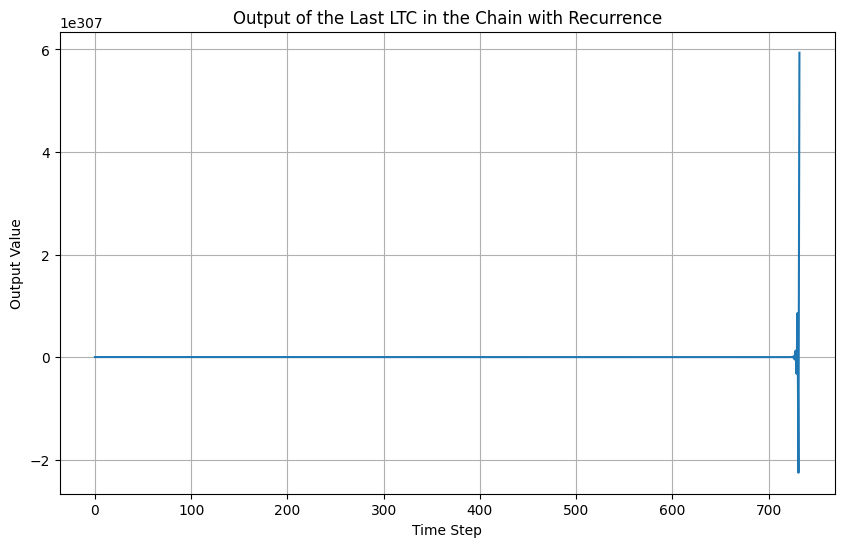

ValueError: supplied range of [-inf, 5.935066252971103e+307] is not finite

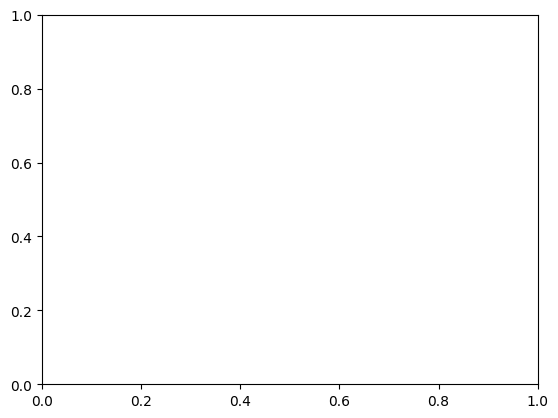

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ltc_update(state, input, tau, gain, recurrence_gain):
    """Simulates the LTC update rule with recurrence."""
    return state + (1/tau) * (-state + gain * input + recurrence_gain * state) #Recurrence added

# Parameters
num_ltcs = 3  # Number of LTCs in the chain
taus = np.random.uniform(0.1, 1.0, num_ltcs)  # Time constants for each LTC
gains = np.random.uniform(0.5, 1.5, num_ltcs)  # Gains for each LTC
recurrence_gains = np.random.uniform(0.1, 0.9, num_ltcs) #Recurrence gains for each LTC
noise_std = 0.1  # Standard deviation of the random noise

# Initialize states
states = np.zeros(num_ltcs)

# Time steps for simulation
time_steps = 1000

# Simulation loop
output_history = []
for _ in range(time_steps):
    # Generate random noise for each LTC
    noise = np.random.normal(0, noise_std, num_ltcs)

    # Propagate input through the chain
    current_input = noise[0]  # Start with noise as the first input
    for i in range(num_ltcs):
        states[i] = ltc_update(states[i], current_input, taus[i], gains[i], recurrence_gains[i])
        current_input = states[i] + noise[i]  # Add noise to the output of each LTC

    output_history.append(states[-1])  # Record the output of the last LTC

# Plot the output
plt.figure(figsize=(10, 6))
plt.plot(output_history)
plt.xlabel("Time Step")
plt.ylabel("Output Value")
plt.title("Output of the Last LTC in the Chain with Recurrence")
plt.grid(True)
plt.show()

# Analyze and visualize the distribution of the output
plt.hist(output_history, bins=50)
plt.xlabel("Output Value")
plt.ylabel("Frequency")
plt.title("Histogram of Output from the Last LTC with Recurrence")
plt.show()